## **FLAML AutoML Time Series Forecasting Model**

# **Installation**

In [ ]:
!pip install "flaml[ts_forecast]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 205 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 53.7 MB/s 
     |████████████████████████████████| 172 kB 43.5 MB/s 
     |████████████████████████████████| 786 kB 57.0 MB/s 
     |████████████████████████████████| 208 kB 62.3 MB/s 
     |████████████████████████████████| 8.9 MB 15.8 MB/s 
     |████████████████████████████████| 70 kB 10.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
  Attempting uninstall: holidays
    Found existing installation: holidays 0.16
    Uninstalling holidays-0.16:
      Successfully uninstalled holidays-0.16
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.1
    Uninstalling prophet-1.1.1:
      Successfully uninstalled prophet-1.1.1


# **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


df_TSLA = pd.read_csv("/content/drive/MyDrive/TSLA/TSLA_daily_price.csv")    # Read csv from the directory

# Make sure there is no missing dates
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'])
df_TSLA = df_TSLA.set_index('Date')    # Changing index for Filling values

df_TSLA = df_TSLA.resample('D').first()    # Resampling & Assigning values
df_TSLA = df_TSLA.bfill().ffill()

df_TSLA.reset_index(inplace=True)    # Resetting the index after filling values

df_TSLA.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-31,1.907333,1.922667,1.880,1.901333,1.901333,8097000.0
1,2012-09-01,1.901333,1.932667,1.860,1.876000,1.876000,11287500.0
2,2012-09-02,1.901333,1.932667,1.860,1.876000,1.876000,11287500.0
3,2012-09-03,1.901333,1.932667,1.860,1.876000,1.876000,11287500.0
4,2012-09-04,1.901333,1.932667,1.860,1.876000,1.876000,11287500.0
5,2012-09-05,1.867333,1.900000,1.854,1.862667,1.862667,9589500.0
6,2012-09-06,1.866667,1.926667,1.860,1.903333,1.903333,12625500.0
7,2012-09-07,1.903333,1.971333,1.900,1.956667,1.956667,14298000.0
8,2012-09-08,1.946667,1.956667,1.820,1.824667,1.824667,22249500.0
9,2012-09-09,1.946667,1.956667,1.820,1.824667,1.824667,22249500.0


# **Splitting Data**

In [ ]:
num_samples = df_TSLA.shape[0]
time_horizon = 50
split_idx = num_samples - time_horizon
# df_TSLA = df_TSLA[:split_idx]  # train_df is a dataframe with two columns: timestamp and label
x_test = df_TSLA[split_idx:]
y_test = df_TSLA[split_idx:]['Close']
train_TSLA = df_TSLA[:split_idx]

In [ ]:
train_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-31,1.907333,1.922667,1.880000,1.901333,1.901333,8097000.0
1,2012-09-01,1.901333,1.932667,1.860000,1.876000,1.876000,11287500.0
2,2012-09-02,1.901333,1.932667,1.860000,1.876000,1.876000,11287500.0
3,2012-09-03,1.901333,1.932667,1.860000,1.876000,1.876000,11287500.0
4,2012-09-04,1.901333,1.932667,1.860000,1.876000,1.876000,11287500.0
...,...,...,...,...,...,...,...
3597,2022-07-07,233.919998,245.363327,232.210007,244.543335,244.543335,81930600.0
3598,2022-07-08,242.333328,254.979996,241.160004,250.763336,250.763336,101854200.0
3599,2022-07-09,252.103333,253.063339,233.626663,234.343338,234.343338,99241200.0
3600,2022-07-10,252.103333,253.063339,233.626663,234.343338,234.343338,99241200.0


In [ ]:
x_test

,Date,Open,High,Low,Close,Adj Close,Volume
3602,2022-07-12,236.846664,239.773331,228.369995,233.070007,233.070007,87930900.0
3603,2022-07-13,225.500000,242.059998,225.033340,237.039993,237.039993,97954500.0
3604,2022-07-14,234.896667,238.653336,229.333328,238.313339,238.313339,78557400.0
3605,2022-07-15,240.000000,243.623337,236.889999,240.066666,240.066666,69683100.0
3606,2022-07-16,244.936661,250.516663,239.603333,240.546661,240.546661,82537500.0
3607,2022-07-17,244.936661,250.516663,239.603333,240.546661,240.546661,82537500.0
3608,2022-07-18,244.936661,250.516663,239.603333,240.546661,240.546661,82537500.0
3609,2022-07-19,245.000000,247.139999,236.976669,245.529999,245.529999,80890200.0
3610,2022-07-20,246.783340,250.663330,243.483337,247.500000,247.500000,88864200.0
3611,2022-07-21,255.106674,273.266663,254.866669,271.706665,271.706665,142032300.0


In [ ]:
y_test

3602    233.070007
3603    237.039993
3604    238.313339
3605    240.066666
3606    240.546661
3607    240.546661
3608    240.546661
3609    245.529999
3610    247.500000
3611    271.706665
3612    272.243347
3613    268.433319
3614    268.433319
3615    268.433319
3616    258.859985
3617    274.820007
3618    280.899994
3619    297.149994
3620    297.276672
3621    297.276672
3622    297.276672
3623    300.586670
3624    307.396667
3625    308.633331
3626    288.170013
3627    290.423340
3628    290.423340
3629    290.423340
3630    283.333344
3631    294.356659
3632    286.630005
3633    300.029999
3634    309.320007
3635    309.320007
3636    309.320007
3637    306.563324
3638    303.996674
3639    302.869995
3640    296.666656
3641    289.913330
3642    289.913330
3643    289.913330
3644    296.453339
3645    297.096680
3646    296.070007
3647    288.089996
3648    284.820007
3649    284.820007
3650    284.820007
3651    277.700012
Name: Close, dtype: float64

# **Building a Time Series Model**

In [ ]:
from flaml import AutoML

train_TSLA["Date"] = pd.to_datetime(train_TSLA["Date"])


automl = AutoML()
settings = {
    "time_budget": 60,
    "metric": 'mape',
    "task": 'ts_forecast',
    'log_file_name': 'Stock_Price.log',
    'eval_method': 'auto',
    'seed': 636362
}
automl.fit(dataframe = train_TSLA,label = 'Close', **settings, period = 180)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
[flaml.automl: 11-07 19:39:31] {2600} INFO - task = ts_forecast
INFO:flaml.automl:task = ts_forecast
[flaml.automl: 11-07 19:39:31] {2602} INFO - Data split method: time
INFO:flaml.automl:Data split method: time
[flaml.automl: 11-07 19:39:31] {2605} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 11-07 19:39:31] {2727} INFO - Minimizing error metric: mape
INFO:flaml.automl:Minimizing error metric: mape
[flaml.automl: 11-07 19:39:32] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb

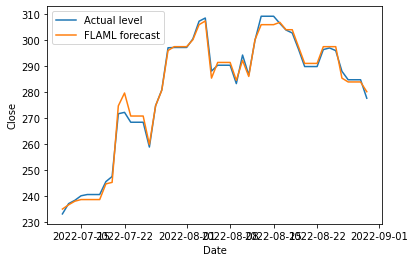

In [ ]:
y_pred = automl.predict(x_test)    # Prediction using the model

import matplotlib.pyplot as plt

plt.plot(x_test.Date, y_test, label='Actual level')
plt.plot(x_test.Date, y_pred, label='FLAML forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()